# SQL-Engage Dataset Summary  
#This notebook provides an exploratory overview of the **SQL-Engage Dataset**, an emotion-aware synthetic dataset for adaptive feedback and engagement modeling in SQL learning.

#Developed by **Dr. Hazra Imran** (Lead Researcher & Dataset Architect) and **Yan Wang** (Research Assistant),  
#Adaptive Learning & Gamification Lab (ALGL), Northeastern University Vancouver.  


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

plt.style.use("ggplot")
sns.set_palette("muted")

df = pd.read_csv("sql_engage_dataset.csv")
print(f"Rows: {df.shape[0]} | Columns: {df.shape[1]}")
df.head()

Rows: 1500 | Columns: 6


,query,error_type,error_subtype,emotion,feedback_target,intended_learning_outcome
0,"SELECT DISTINCT Level_of_Access, COUNT(*) AS A...",construction,inefficient query,sadness,"Don't worry, I'm here to help! Just remove DIS...",Learning to avoid unnecessary DISTINCT
1,SELECT * FROM Employees e1 INNER JOIN Employee...,construction,inefficient query,calmness,Stay focused on efficiency! This self-join is ...,Learning to avoid unnecessary self-joins
2,SELECT Robot_ID FROM Robots WHERE Robot_ID NOT...,construction,inefficient query,happiness,"Good use of NOT IN! However, this can be simpl...",Understanding how to simplify NOT IN subquerie...
3,"SELECT r.Model, l.Log_ID FROM Robots r JOIN Lo...",construction,inefficient query,anger,Don't worry! You are very close! The subquery ...,Understanding how to simplify subqueries with ...
4,SELECT DISTINCT Employee_ID FROM Employees WHE...,construction,inefficient query,neutral,"Employee_ID is the primary key in Employees, t...",Learning to avoid unnecessary DISTINCT


In [5]:
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   query                      1500 non-null   object
 1   error_type                 1500 non-null   object
 2   error_subtype              1500 non-null   object
 3   emotion                    1500 non-null   object
 4   feedback_target            1500 non-null   object
 5   intended_learning_outcome  1500 non-null   object
dtypes: object(6)
memory usage: 70.4+ KB


query                        0
error_type                   0
error_subtype                0
emotion                      0
feedback_target              0
intended_learning_outcome    0
dtype: int64

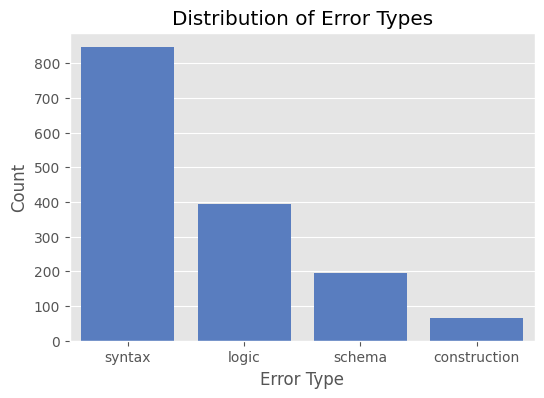

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="error_type", order=df["error_type"].value_counts().index)
plt.title("Distribution of Error Types")
plt.xlabel("Error Type")
plt.ylabel("Count")
plt.show()

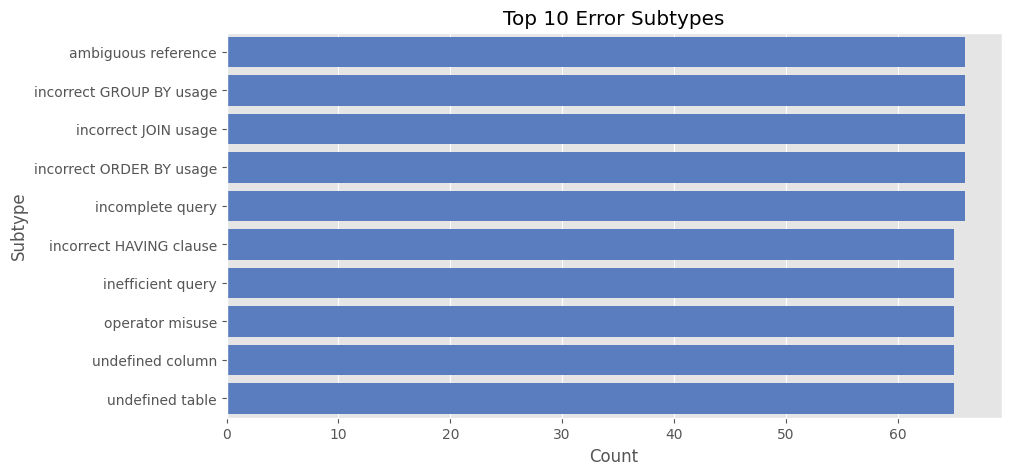

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="error_subtype", order=df["error_subtype"].value_counts().head(10).index)
plt.title("Top 10 Error Subtypes")
plt.xlabel("Count")
plt.ylabel("Subtype")
plt.show()

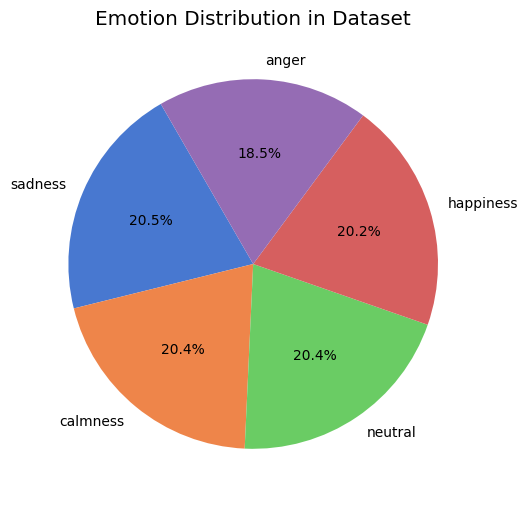

In [8]:
plt.figure(figsize=(6,6))
df["emotion"].value_counts().plot.pie(autopct="%1.1f%%", startangle=120)
plt.ylabel("")
plt.title("Emotion Distribution in Dataset")
plt.show()

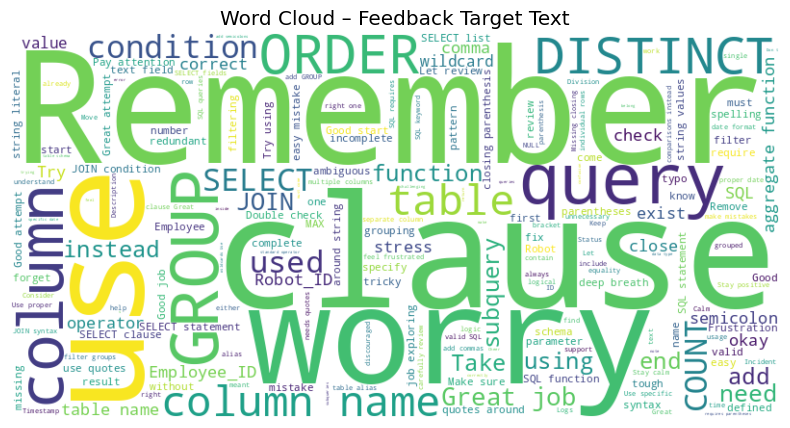

In [9]:
text = " ".join(str(t) for t in df["feedback_target"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud – Feedback Target Text")
plt.show()

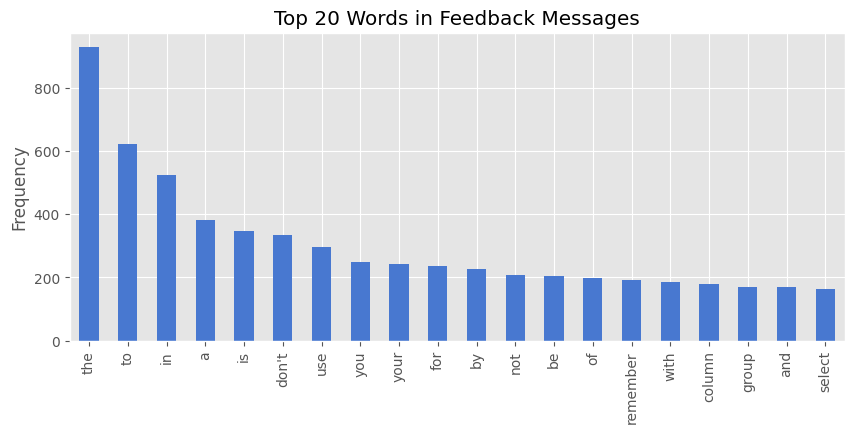

In [10]:
from collections import Counter
words = [w.lower() for t in df["feedback_target"].dropna() for w in t.split()]
pd.Series(Counter(words)).nlargest(20).plot(kind='bar', figsize=(10,4))
plt.title("Top 20 Words in Feedback Messages")
plt.ylabel("Frequency")
plt.show()

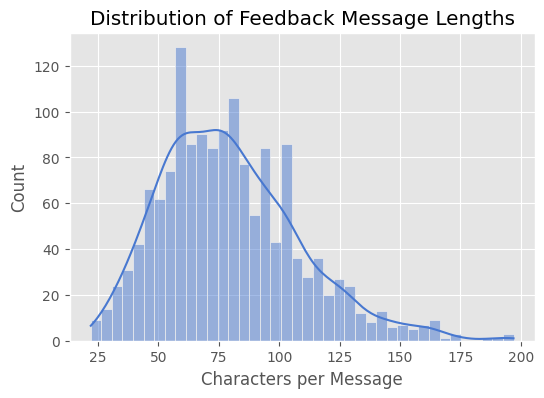

In [11]:
df["feedback_length"] = df["feedback_target"].astype(str).apply(len)

plt.figure(figsize=(6,4))
sns.histplot(df["feedback_length"], bins=40, kde=True)
plt.title("Distribution of Feedback Message Lengths")
plt.xlabel("Characters per Message")
plt.show()

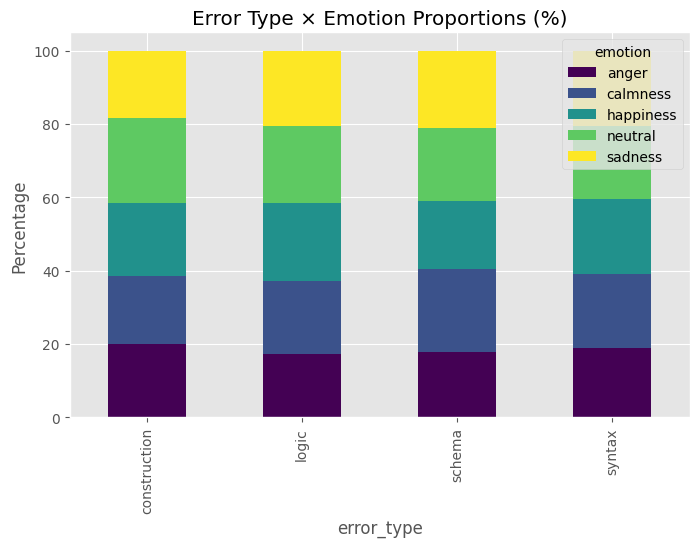

In [12]:
ct = pd.crosstab(df["error_type"], df["emotion"], normalize="index") * 100
ct.plot(kind="bar", stacked=True, figsize=(8,5), colormap="viridis")
plt.title("Error Type × Emotion Proportions (%)")
plt.ylabel("Percentage")
plt.show()

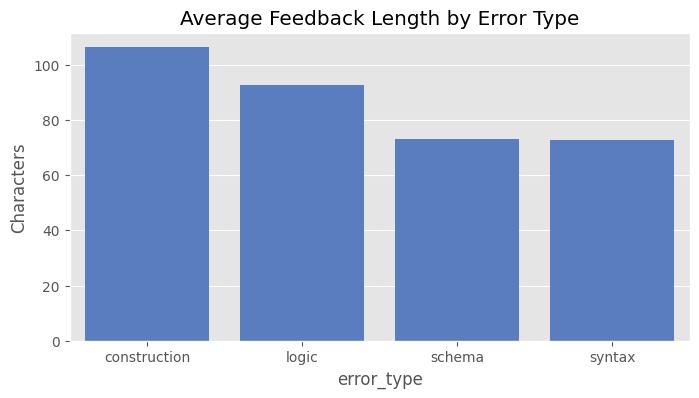

In [14]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x="error_type", y="feedback_length", errorbar=None)
plt.title("Average Feedback Length by Error Type")
plt.ylabel("Characters")
plt.show()

In [15]:
summary = df.groupby("error_type").agg({
    "query":"count",
    "feedback_length":"mean"
}).rename(columns={"query":"count", "feedback_length":"avg_feedback_length"})
summary

,count,avg_feedback_length
error_type,,
construction,65,106.323077
logic,394,92.680203
schema,195,73.046154
syntax,846,72.912530


## Credits  
# Lead Researcher & Dataset Architect:** Dr. Hazra Imran  
# Research Assistant:** Yan Wang  

# Adaptive Learning & Gamification Lab (ALGL)  
# Northeastern University Vancouver  
# https://hazraimran.ca/algl  